# Tugas Besar Machine Learning Eksperimen

## confused matrix, akurasi, presisi, recall, F1

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm,datasets,model_selection,metrics,neural_network
import pickle

In [2]:
def confused_matrix(y_true,y_pred):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
    for i in range (len(y_pred)):
        if(y_pred[i] == 1 and y_true[i] == 1):tp = tp + 1 # true positive
        elif(y_pred[i] == 1 and y_true[i] == 0):fp = fp + 1 # false positive
        elif(y_pred[i] == 0 and y_true[i] == 1):fn = fn + 1 # false negative
        elif(y_pred[i] == 0 and y_true[i] == 0):tn = tn + 1 # true negative
    return tp,fp,fn,tn

def accuracy(tp,fp,fn,tn):
    return((tp+tn)/(tp+fp+fn+tn))

def precision(tp,fp): #PPV
    return(tp/(tp+fp))

def recall(tp,fn): #TPR (bukan dibaca tepar)
    return(tp/(tp+fn))

def f1(tp,fp,fn):
    return((2*tp)/(2*tp+fp+fn))


In [3]:
y_pred = [0,0,1,0,1,0,1,0,0,1]
y_true = [0,1,1,1,0,1,0,0,1,0]
tp,fp,fn,tn = confused_matrix(y_true,y_pred)
print("hasil implementasi")
print("tp ",str(tp))
print("fp ",str(fp))
print("fn ",str(fn))
print("tn ",str(tn))
print("accuracy ",str(accuracy(tp,fp,fn,tn)))
print("precision ",str(precision(tp,fp)))
print("recall ",str(recall(tp,fn)))
print("f1 ",str(f1(tp,fp,fn)))
print("hasil SKlearn")
tn1, fp1, fn1, tp1 = metrics.confusion_matrix(y_true,y_pred).ravel()
print("tp ",str(tp1))
print("fp ",str(fp1))
print("fn ",str(fn1))
print("tn ",str(tn1))
print("accuracy ",str(metrics.accuracy_score(y_true,y_pred)))
print("precision ",str(metrics.precision_score(y_true,y_pred)))
print("recall ",str(metrics.recall_score(y_true,y_pred)))
print("f1 ",str(metrics.f1_score(y_true,y_pred)))

hasil implementasi
tp  1
fp  3
fn  4
tn  2
accuracy  0.3
precision  0.25
recall  0.2
f1  0.2222222222222222
hasil SKlearn
tp  1
fp  3
fn  4
tn  2
accuracy  0.3
precision  0.25
recall  0.2
f1  0.22222222222222224


## FFNN Learning dataset iris

Confusion matrix
[[3 0 0]
 [0 5 0]
 [0 2 5]]
[[5.5 2.3 4.  1.3]
 [5.3 3.7 1.5 0.2]
 [6.4 3.2 4.5 1.5]
 [5.9 3.2 4.8 1.8]
 [6.3 2.7 4.9 1.8]
 [7.6 3.  6.6 2.1]
 [6.9 3.1 5.1 2.3]
 [5.8 2.7 5.1 1.9]
 [6.1 2.8 4.7 1.2]
 [4.6 3.6 1.  0.2]
 [7.2 3.  5.8 1.6]
 [4.5 2.3 1.3 0.3]
 [7.2 3.2 6.  1.8]
 [6.9 3.2 5.7 2.3]
 [6.  2.9 4.5 1.5]]
[1 0 1 1 2 2 2 2 1 0 2 0 2 2 1]
accuracy  0.8666666666666667
macro precision  0.9047619047619048
macro recall  0.9047619047619048
macro f1-score  0.8888888888888888


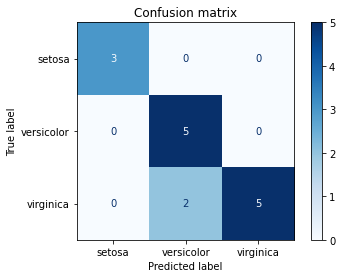

In [8]:
X, y = datasets.load_iris(return_X_y=True)
class_names = datasets.load_iris().target_names
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1,train_size=0.9)
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
titles_options = [("Confusion matrix", None)]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)
    print(X_test)
    print(y_test)
    print("accuracy ", str(metrics.accuracy_score(y_test, y_pred)))
    print("macro precision ", str(metrics.precision_score(y_test, y_pred, average='macro')))
    print("macro recall ", str(metrics.recall_score(y_test, y_pred, average='macro')))
    print("macro f1-score ", str(metrics.f1_score(y_test, y_pred, average='macro')))
plt.show()

## FFNN 10-Fold

In [5]:
kf = model_selection.KFold(n_splits=10)
clf = neural_network.MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=10000)
for train_index,test_index in kf.split(X):
    clf.fit(X[train_index], y[train_index])
print("accuracy ",str(metrics.accuracy_score(y_test,clf.predict(X_test))))
print("precision ",str(metrics.precision_score(y_test,clf.predict(X_test),average='macro',zero_division=1)))
print("recall ",str(metrics.recall_score(y_test,clf.predict(X_test),average='macro',zero_division=1)))
print("f1 ",str(metrics.f1_score(y_test,clf.predict(X_test),average='macro',zero_division=1)))
print("Confused Matrix")
print(metrics.confusion_matrix(y_test,clf.predict(X_test))) 

accuracy  1.0
precision  1.0
recall  1.0
f1  1.0
Confused Matrix
[[7 0 0]
 [0 2 0]
 [0 0 6]]


## File save/open

In [6]:
file_model_write = open("train_model.txt", "wb")
pickle.dump(clf, file_model_write)
file_model_open = open("train_model.txt", "rb")
loaded_model = pickle.load(file_model_open)

## Model

In [14]:
new_inst_X = [[5.0, 2.0, 4.0, 1.0]]
new_inst_Y = [2]
new_inst_Y_pred = loaded_model.predict(new_inst_X)
print("accuracy ", str(metrics.accuracy_score(new_inst_Y, new_inst_Y_pred)))
print("precision ", str(metrics.prediction_score(new_inst_Y, new_inst_Y_pred, average='macro', zero_division=1)))
print("recall ", str(metrics.recall_score(new_inst_Y, new_inst_Y_pred, average='macro', zero_division=1)))
print("f1 ", str(metrics.f1_score(new_inst_Y, new_inst_Y_pred, average='macro', zero_division=1)))
print("Confused Matrix")
print(metrics.confusion_matrix(new_inst_Y, new_inst_Y_pred))

accuracy  0.0


AttributeError: module 'sklearn.metrics' has no attribute 'prediction_score'

## Analisis
pada nomor 2, hasil implementasi sudah sesuai dengan sklearn karena hasil implementasi menggunakan rumus yang sesuai dengan cara kerja secara teoritis <br>
pada nomor 3, ada hasil yang prediksi yang tidak sesuai dengan nilai sebenarnya karena ada kemiripan pada nilai X sehingga terjadi <i>misclasify</i>